## **Guide to Generate RoHo Score File (roho_scores.tsv)**

Install UShER Toolkit and matUtils


```
conda create -n usher_env -c bioconda -c conda-forge usher
```

Generate RoHo Score Using matUtils


```
matUtils summary -i public-2021-06-09.all.masked.nextclade.pangolin.pb.gz -R roho_scores.tsv

```




Each row = one mutation event in the tree
Each column contains information needed to compute RoHo:

Column	Description
mutation: Nucleotide mutation (e.g., A22106T)

parent_node:	Node in the tree where the mutation occurred

child_count:	Number of sister clades at that split

occurrence_node:	Node that carries the mutation
offspring_with:	Descendants of the mutated clade
median_offspring_without:	Median size of sister clades without the mutation
single_roho:	log10(offspring_with / median_offspring_without)

RoHo = log₁₀(# descendants with mutation / median # without)

https://www.nature.com/articles/s41467-020-19818-2

https://usher-wiki.readthedocs.io/en/latest/tutorials.html

https://usher-wiki.readthedocs.io/en/latest/matUtils.html

Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data Loading

In [3]:
rdf = pd.read_csv('.../roho_scores.tsv',sep='\t', encoding="utf-8", low_memory=False, index_col=False)

In [4]:
rdf.head(30)

,mutation,parent_node,child_count,occurrence_node,offspring_with,median_offspring_without,single_roho
0,A22106T,node_1,138,node_1148324,6,3.0,0.301030
1,A26565T,node_1,138,node_1148324,6,3.0,0.301030
2,A26823T,node_1,138,node_1148324,6,3.0,0.301030
3,A2810T,node_1,138,node_193,2,4.0,-0.301030
4,A29297T,node_1,138,node_1148324,6,3.0,0.301030
5,C26370G,node_1,138,node_1148324,6,3.0,0.301030
6,C28383G,node_1,138,node_1148324,6,3.0,0.301030
7,C28432G,node_1,138,node_1148324,6,3.0,0.301030
8,T24763A,node_1,138,node_1148324,6,3.0,0.301030
9,T26279A,node_1,138,node_1148324,6,3.0,0.301030


 Initial Exploration

In [5]:
by_mut_rohos = []
for m, sdf in rdf.groupby("mutation"):
    if sdf.shape[0] >= 3:
        by_mut_rohos.append(np.mean(sdf.single_roho))

Visualization

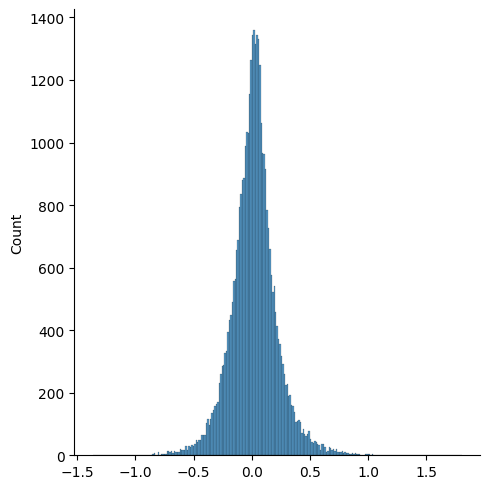

In [6]:
max(by_mut_rohos)
plot = sns.displot(by_mut_rohos)

In [7]:
plot.savefig('rho_score.png')

In [8]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# rdf = pd.read_csv(
#     "roho_scores.tsv", sep="\t", encoding="utf-8", low_memory=False, index_col=False
# )
# by_mut_rohos = []
# for m, sdf in rdf.groupby("mutation"):
#     if sdf.shape[0] >= 3:
#         by_mut_rohos.append(np.mean(sdf.single_roho))

# max(by_mut_rohos)
# plot = sns.displot(by_mut_rohos)
# plt.savefig('output.png')

In [9]:
rdf.head(2)

,mutation,parent_node,child_count,occurrence_node,offspring_with,median_offspring_without,single_roho
0,A22106T,node_1,138,node_1148324,6,3.0,0.30103
1,A26565T,node_1,138,node_1148324,6,3.0,0.30103


In [10]:
rdf['single_roho'] = rdf['single_roho'].astype(int)

In [11]:
rdf.head

<bound method NDFrame.head of         mutation   parent_node  child_count occurrence_node  offspring_with  \
0        A22106T        node_1          138    node_1148324               6   
1        A26565T        node_1          138    node_1148324               6   
2        A26823T        node_1          138    node_1148324               6   
3         A2810T        node_1          138        node_193               2   
4        A29297T        node_1          138    node_1148324               6   
...          ...           ...          ...             ...             ...   
1102162  G13201T  node_1148374            5    node_1148380               2   
1102163  G29751T  node_1148374            5    node_1148377               2   
1102164  C27874T  node_1148383            2    node_1148384               7   
1102165   C3037T  node_1148383            2    node_1148389               2   
1102166  T26767C  node_1148383            2    node_1148384               7   

         median_offspring_without  single_roho  
0                             3.0            0  
1                             3.0            0  
2                             3.0            0  
3                             4.0            0  
4                             3.0            0  
...                           ...          ...  
1102162                       2.0            0  
1102163                       2.0            0  
1102164                       2.0            0  
1102165                       7.0            0  
1102166                       2.0            0  

[1102167 rows x 7 columns]>

In [12]:
  rdf.groupby('mutation').agg({'single_roho': ['mean', 'count']})

single_roho      
                mean count
mutation                  
A10005G    -0.500000     2
A10005T     0.000000     1
A10018G     0.052632    19
A10021G     0.000000    15
A10024C     0.500000     2
...              ...   ...
T9995G      0.000000    10
T9996C      0.000000     1
T99A        0.000000     2
T99C        0.125000    16
T99G        0.000000     4

[56182 rows x 2 columns]

In [13]:
  rdf.groupby('mutation').agg({'single_roho': ['mean', 'count']}).sort_values(('single_roho', 'mean'), ascending=False)

single_roho      
                mean count
mutation                  
T29445C          3.0     1
T17518C          3.0     1
T27923C          2.0     1
G2782C           2.0     1
C26684G          2.0     1
...              ...   ...
A16550C         -3.0     1
G1242T          -3.0     1
A28841C         -3.0     1
A23854C         -5.0     1
T15971A         -6.0     1

[56182 rows x 2 columns]

0.026417339372836267


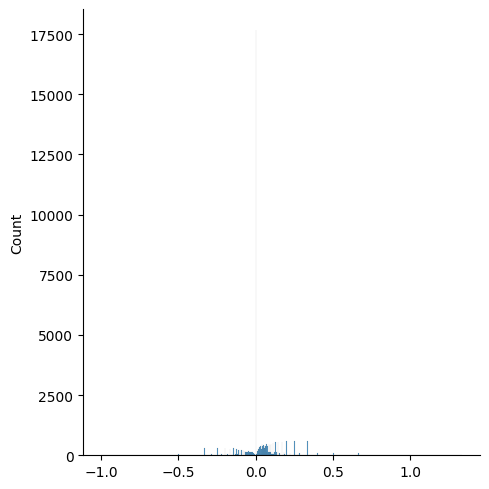

In [14]:
by_mut_rohos = []
for m, sdf in rdf.groupby("mutation"):
    if sdf.shape[0] >= 3:
        by_mut_rohos.append(np.mean(sdf.single_roho))
print(np.mean(by_mut_rohos))
sns.displot(by_mut_rohos)

In [15]:
top_mutations = rdf.groupby('mutation').agg({'single_roho': ['mean', 'count']}).sort_values(('single_roho', 'mean'), ascending=False)
top_mutations

single_roho      
                mean count
mutation                  
T29445C          3.0     1
T17518C          3.0     1
T27923C          2.0     1
G2782C           2.0     1
C26684G          2.0     1
...              ...   ...
A16550C         -3.0     1
G1242T          -3.0     1
A28841C         -3.0     1
A23854C         -5.0     1
T15971A         -6.0     1

[56182 rows x 2 columns]

Descriptive Stats and Filtering


In [16]:


# Group by mutation and calculate average and count
mutation_stats = rdf.groupby('mutation').agg(
    avg_roho=('single_roho', 'mean'),
    n_occurrences=('single_roho', 'count')
).sort_values('avg_roho', ascending=False)

# Filter to mutations with ≥3 occurrences
filtered = mutation_stats[mutation_stats.n_occurrences >= 3]

top_10 = filtered.head(10)
bottom_10 = filtered.tail(10)



In [17]:
top_10

,avg_roho,n_occurrences
mutation,,
T16289C,1.333333,3
A11291G,1.000000,3
G25963C,1.000000,3
T22207A,1.000000,3
T10507C,1.000000,4
C25452G,1.000000,3
A15984T,1.000000,3
G4300C,1.000000,3
G22200C,1.000000,3


In [18]:
bottom_10

,avg_roho,n_occurrences
mutation,,
G27489A,-0.666667,3
A26555T,-0.750000,4
T29254G,-0.750000,4
T20838G,-0.750000,4
T5863C,-0.750000,4
T3478G,-0.750000,4
A29658G,-1.000000,3
G614C,-1.000000,3
T27410A,-1.000000,3


Text(0.5, 9.444444444444438, 'Average RoHo Score')

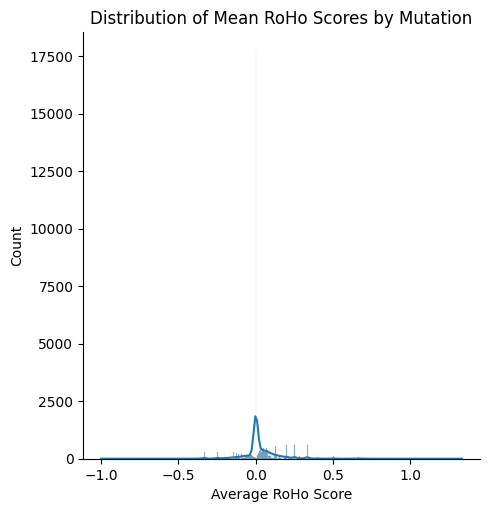

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(filtered['avg_roho'], kde=True)
plt.title("Distribution of Mean RoHo Scores by Mutation")
plt.xlabel("Average RoHo Score")


<Axes: xlabel='count', ylabel='Count'>

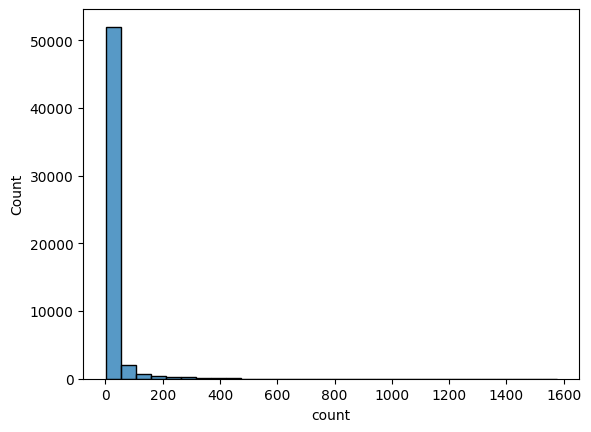

In [20]:
mutation_counts = rdf['mutation'].value_counts()
sns.histplot(mutation_counts, bins=30)


In [21]:
from scipy.stats import spearmanr
counts = mutation_counts.loc[rdf['mutation']].reset_index(drop=True)
corr, p = spearmanr(counts, rdf['single_roho'])
print(f"Spearman ρ: {corr:.2f}, p = {p:.2e}")


Spearman ρ: 0.00, p = 1.39e-03


In [22]:
mean = filtered['avg_roho'].mean()
std = filtered['avg_roho'].std()
outliers = filtered[(filtered['avg_roho'] > mean + 2*std) | (filtered['avg_roho'] < mean - 2*std)]


In [23]:
outliers.head(5)

,avg_roho,n_occurrences
mutation,,
T16289C,1.333333,3
A11291G,1.000000,3
G25963C,1.000000,3
T22207A,1.000000,3
T10507C,1.000000,4


Gene Annotation

Uses SARS-CoV-2 reference genome coordinates to annotate genes
and classify as 'genic' or 'intergenic' mutation

Adds biological meaning — e.g., A23403G → Spike gene → genic

Extracts numeric genomic position from mutation strings like A22106T


Maps the mutation position to a known SARS-CoV-2 gene

In [24]:
import pandas as pd

# SARS-CoV-2 gene coordinate ranges (based on NC_045512.2)
gene_ranges = {
    'ORF1ab': (266, 21555),
    'S': (21563, 25384),
    'ORF3a': (25393, 26220),
    'E': (26245, 26472),
    'M': (26523, 27191),
    'ORF6': (27202, 27387),
    'ORF7a': (27394, 27759),
    'ORF7b': (27756, 27887),
    'ORF8': (27894, 28259),
    'N': (28274, 29533),
    'ORF10': (29558, 29674),
}

# Extract numeric position from mutation string like "A22106T"
def extract_position(mutation):
    import re
    match = re.search(r'\d+', mutation)
    return int(match.group()) if match else None

# Map position to gene and region class
def get_gene_and_class(pos):
    for gene, (start, end) in gene_ranges.items():
        if start <= pos <= end:
            return gene, 'genic'
    return 'intergenic', 'intergenic'

# Apply extraction and annotation
rdf['pos'] = rdf['mutation'].apply(extract_position)
rdf[['gene', 'region_class']] = rdf['pos'].apply(
    lambda p: pd.Series(get_gene_and_class(p))
)
rdf['mutation_type'] = 'unknown'  # You can refine this later

# Preview
print(rdf[['mutation', 'pos', 'gene', 'region_class']].head())


  mutation    pos    gene region_class
0  A22106T  22106       S        genic
1  A26565T  26565       M        genic
2  A26823T  26823       M        genic
3   A2810T   2810  ORF1ab        genic
4  A29297T  29297       N        genic


In [25]:
# aggregate per mutation
annotated_df = rdf.groupby('mutation').agg(
    avg_roho=('single_roho', 'mean'),
    n_occurrences=('single_roho', 'count'),
    region_class=('region_class', 'first'),  # Use first since it's same for all rows per mutation
    gene=('gene', 'first')
).reset_index()

# Filter to mutations with at least 3 occurrences
annotated_df = annotated_df[annotated_df.n_occurrences >= 3]


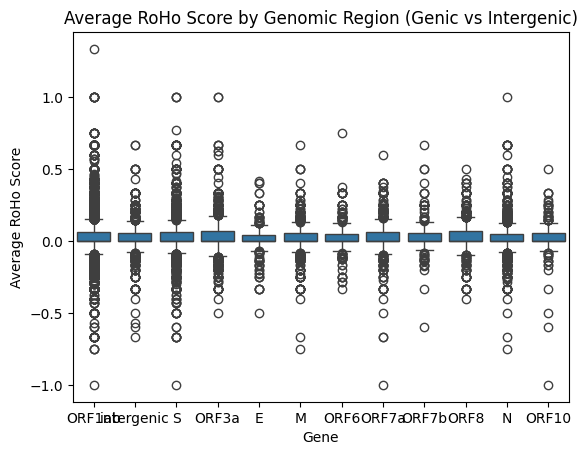

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=annotated_df, x='gene', y='avg_roho')
plt.title("Average RoHo Score by Genomic Region (Genic vs Intergenic)")
plt.ylabel("Average RoHo Score")
plt.xlabel("Gene")
plt.show()


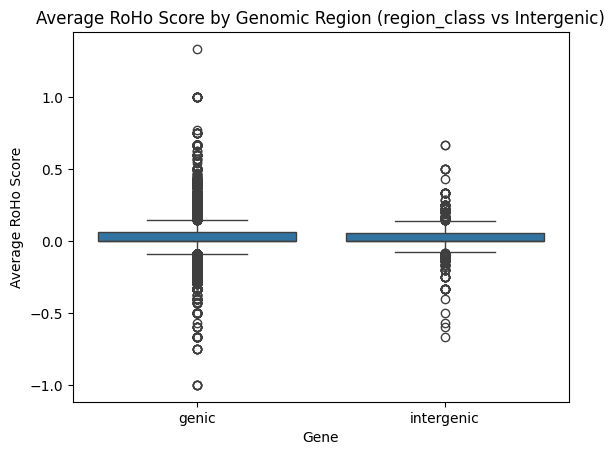

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=annotated_df, x='region_class', y='avg_roho')
plt.title("Average RoHo Score by Genomic Region (region_class vs Intergenic)")
plt.ylabel("Average RoHo Score")
plt.xlabel("Gene")
plt.show()

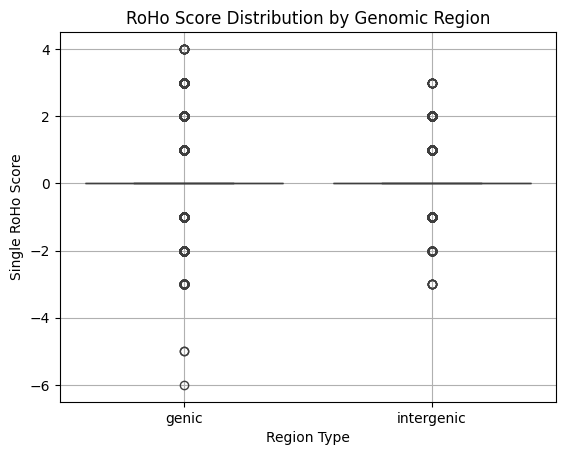

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=rdf, x='region_class', y='single_roho')
plt.title("RoHo Score Distribution by Genomic Region")
plt.xlabel("Region Type")
plt.ylabel("Single RoHo Score")
plt.grid(True)
plt.show()


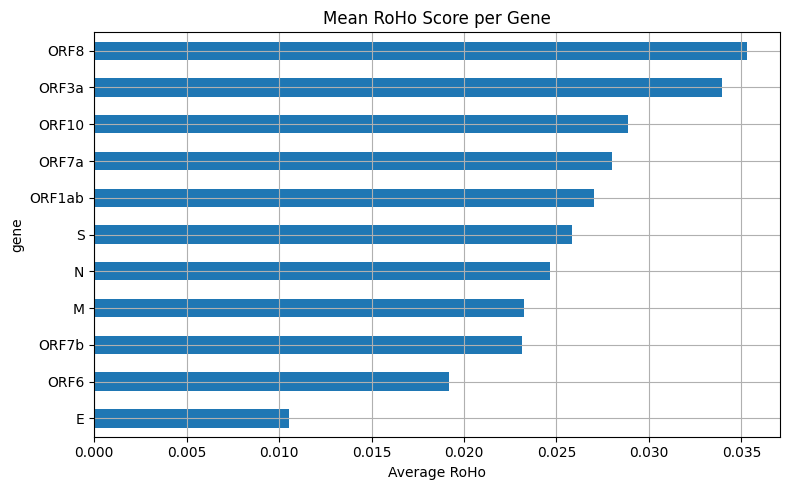

In [29]:
gene_roho = rdf[rdf['region_class'] == 'genic'].groupby('gene')['single_roho'].mean().sort_values()

gene_roho.plot(kind='barh', title="Mean RoHo Score per Gene", figsize=(8,5))
plt.xlabel("Average RoHo")
plt.tight_layout()
plt.grid(True)
plt.show()


In [30]:
top10 = rdf[(rdf['region_class'] == 'genic')]
top10 = top10.groupby('mutation').agg(
    avg_roho=('single_roho', 'mean'),
    gene=('gene', 'first'),
    count=('mutation', 'count')
).sort_values('avg_roho', ascending=False).head(10)

print(top10)


          avg_roho    gene  count
mutation                         
T17518C        3.0  ORF1ab      1
T29445C        3.0       N      1
G2782C         2.0  ORF1ab      1
A20772T        2.0  ORF1ab      1
A11089C        2.0  ORF1ab      1
A3004G         2.0  ORF1ab      1
T18210G        2.0  ORF1ab      1
A6058C         2.0  ORF1ab      1
T17694G        2.0  ORF1ab      1
A6587C         2.0  ORF1ab      1


In [31]:
hits = rdf[rdf['region_class'] == 'genic'].groupby('mutation').agg(
    avg_roho=('single_roho', 'mean'),
    count=('mutation', 'count'),
    gene=('gene', 'first')
).query("count >= 3 and avg_roho >= 0.3")

print(hits)


          avg_roho  count    gene
mutation                         
A10075T   0.333333      3  ORF1ab
A10471C   0.333333      3  ORF1ab
A1047G    0.333333      6  ORF1ab
A10829C   0.400000      5  ORF1ab
A10948G   0.375000      8  ORF1ab
...            ...    ...     ...
T9693C    0.666667      3  ORF1ab
T9710C    0.333333      3  ORF1ab
T9721A    0.333333      3  ORF1ab
T9842C    0.333333      6  ORF1ab
T9850G    0.333333      3  ORF1ab

[981 rows x 3 columns]


In [32]:
threshold = annotated_df['avg_roho'].quantile(0.75)
annotated_df['high_roho'] = (annotated_df['avg_roho'] >= threshold).astype(int)


In [33]:
features = annotated_df[['gene', 'region_class', 'n_occurrences', 'high_roho']].copy()

# One-hot encode gene and region_class
features = pd.get_dummies(features, columns=['gene', 'region_class'])


Machine Learning Pipeline

Random Forest
Trains a baseline model to classify mutations as high/low RoHo
Uses balanced class weights due to class imbalance

SMOTE Oversampling

Applies SMOTE to synthetically balance the minority class (high_roho=1)


Feature Importance
Visualizes which features (e.g., gene_S, region_class_genic) most influence predictions

 Evaluates models using ROC AUC — critical for imbalanced binary tasks



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = features.drop("high_roho", axis=1)
y = features["high_roho"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#model = RandomForestClassifier(random_state=42)
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.59      0.68      5606
           1       0.33      0.57      0.42      1965

    accuracy                           0.59      7571
   macro avg       0.56      0.58      0.55      7571
weighted avg       0.67      0.59      0.61      7571



In [35]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

model.fit(X_res, y_res)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_res, y_res)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

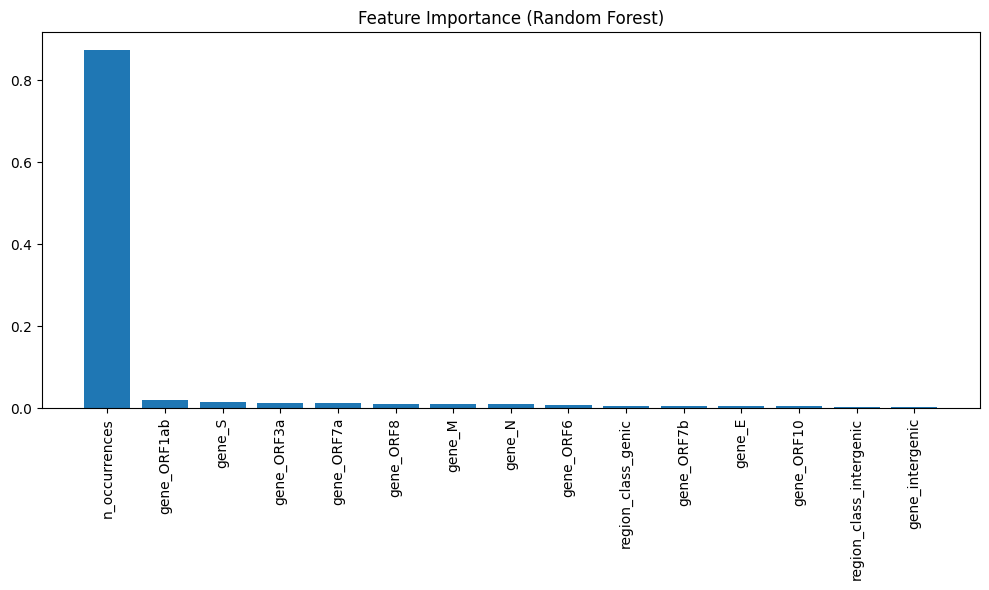

In [37]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feat_names = X.columns
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[sorted_idx], align='center')
plt.xticks(range(len(importances)), feat_names[sorted_idx], rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lr = LogisticRegression(class_weight='balanced', max_iter=500)
lr.fit(X_scaled, y)


LogisticRegression(class_weight='balanced', max_iter=500)

<Axes: xlabel='high_roho', ylabel='n_occurrences'>

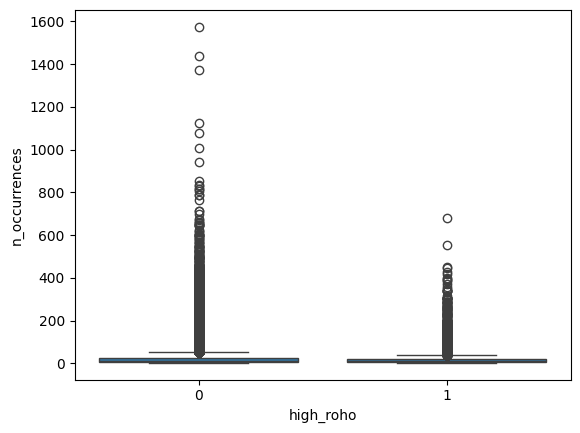

In [39]:
sns.boxplot(data=annotated_df, x='high_roho', y='n_occurrences')


In [40]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC AUC:", roc_auc)


ROC AUC: 0.6576933656142683


In [41]:
annotated_df['predicted_prob'] = model.predict_proba(X)[:,1]
top_preds = annotated_df.sort_values('predicted_prob', ascending=False).head(20)


In [42]:
top_preds.head(500)

,mutation,avg_roho,n_occurrences,region_class,gene,high_roho,predicted_prob
23156,C26807T,0.058824,34,genic,M,1,1.000000
33889,G26155T,0.118644,59,genic,ORF3a,1,1.000000
33412,G25311T,0.065041,123,genic,S,1,1.000000
22411,C25317T,0.073171,123,genic,S,1,1.000000
46578,T23063A,0.064516,124,genic,S,1,1.000000
9930,A26693G,0.058824,34,genic,M,1,1.000000
34202,G26828A,0.176471,34,genic,M,1,1.000000
49144,T26957C,0.058824,34,genic,M,1,1.000000
33521,G25481T,0.067797,59,genic,ORF3a,1,1.000000
33613,G25641T,0.108696,92,genic,ORF3a,1,0.995000


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = features.drop("high_roho", axis=1)
y = features["high_roho"]
model = RandomForestClassifier().fit(X, y)


ML MODEL XGBoost

XGBoost Classification on RoHo Data

1. Prepare Data

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import xgboost as xgb

# Select features
features = annotated_df[['gene', 'region_class', 'n_occurrences', 'high_roho']].copy()

# One-hot encode categorical variables
features = pd.get_dummies(features, columns=['gene', 'region_class'])

# Split X and y
X = features.drop('high_roho', axis=1)
y = features['high_roho']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


2. Train XGBoost Model

In [45]:
# Initialize XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=(len(y) - sum(y)) / sum(y),  # auto-balance positive class
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:17:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


3. Evaluate Performance

In [46]:
# AUC Score
auc = roc_auc_score(y_test, y_prob)
print(f"ROC AUC: {auc:.3f}")

# Classification report
print(classification_report(y_test, y_pred))


ROC AUC: 0.636
              precision    recall  f1-score   support

           0       0.82      0.56      0.67      5634
           1       0.33      0.63      0.44      1937

    accuracy                           0.58      7571
   macro avg       0.58      0.60      0.55      7571
weighted avg       0.69      0.58      0.61      7571



4. Feature Importance

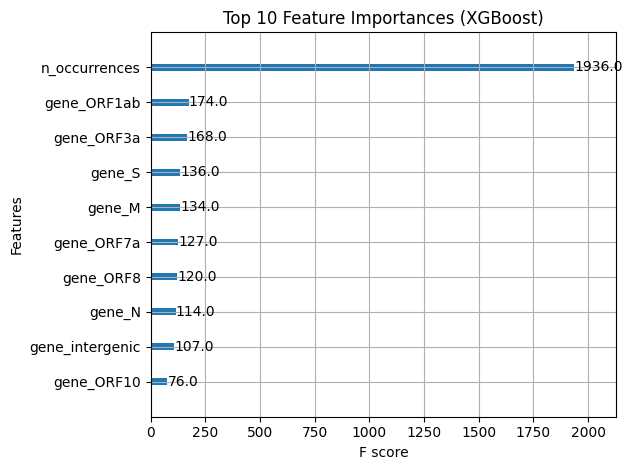

In [47]:
import matplotlib.pyplot as plt

xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()


Hyperparameter Tuning with GridSearchCV (XGBoost)

Add Cross-Validated Grid Search

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'scale_pos_weight': [(len(y) - sum(y)) / sum(y)]  # keeps class balance
}

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best params:", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:18:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 2.9086215797625194, 'subsample': 0.8}


2. Evaluate Best Model

In [49]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print(f"ROC AUC (tuned): {roc_auc_score(y_test, y_prob):.3f}")
print(classification_report(y_test, y_pred))


ROC AUC (tuned): 0.643
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      5634
           1       0.34      0.63      0.44      1937

    accuracy                           0.59      7571
   macro avg       0.58      0.60      0.56      7571
weighted avg       0.70      0.59      0.62      7571



SHAP-Based Interpretation (Model Explainability)

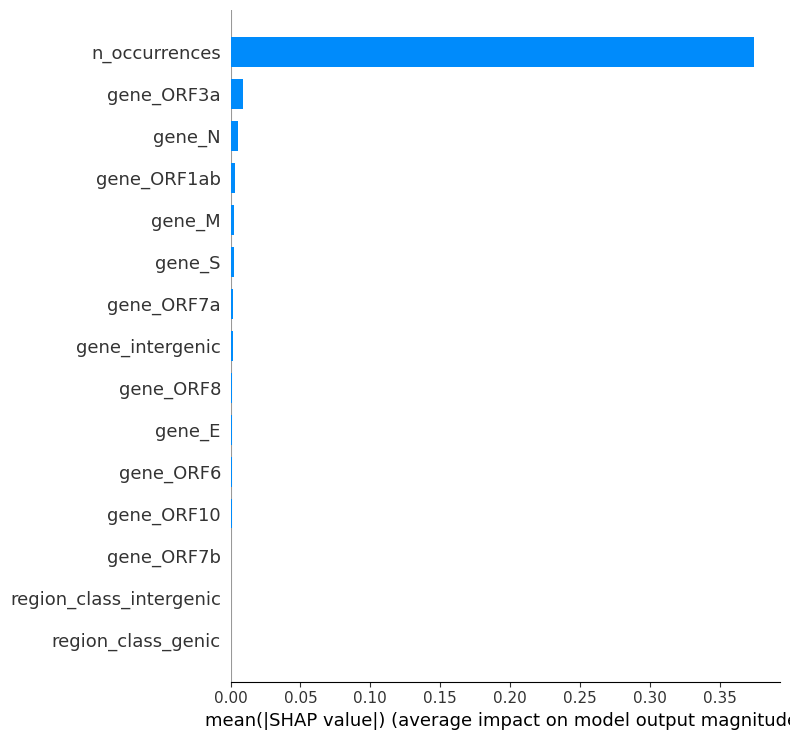

In [50]:
import shap

# Use TreeExplainer for XGBoost
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=True)


Compare with LightGBM

In [51]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(
    class_weight='balanced',
    random_state=42
)
lgb_model.fit(X_train, y_train)

y_prob_lgb = lgb_model.predict_proba(X_test)[:, 1]
print("ROC AUC (LightGBM):", roc_auc_score(y_test, y_prob_lgb))


[LightGBM] [Info] Number of positive: 7748, number of negative: 22536
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 30284, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
ROC AUC (LightGBM): 0.636932287906836


** a compare_models() function that:**

Trains RandomForest, XGBoost, and LightGBM

(Optionally) tunes XGBoost using GridSearchCV

Evaluates each model with ROC AUC, classification report, and plots

Displays all AUCs side-by-side for easy comparison

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import shap
import seaborn as sns
import pandas as pd

def compare_models(features_df, label_col='high_roho'):
    # Preprocessing
    features = features_df.copy()
    X = features.drop(label_col, axis=1)
    y = features[label_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    # Store results
    results = {}

    # Random Forest
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    rf_prob = rf.predict_proba(X_test)[:, 1]
    results['RandomForest'] = roc_auc_score(y_test, rf_prob)

    # XGBoost (tuned)
    scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )

    param_grid = {
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [100, 200],
        'subsample': [0.8, 1.0]
    }

    grid = GridSearchCV(
        xgb_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)
    xgb_best = grid.best_estimator_
    xgb_prob = xgb_best.predict_proba(X_test)[:, 1]
    results['XGBoost'] = roc_auc_score(y_test, xgb_prob)

    # SHAP plot for XGBoost
    explainer = shap.TreeExplainer(xgb_best)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
    plt.title("XGBoost Feature Importance (SHAP)")
    plt.tight_layout()
    plt.show()

    # LightGBM
    lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_prob = lgb_model.predict_proba(X_test)[:, 1]
    results['LightGBM'] = roc_auc_score(y_test, lgb_prob)

    # Final AUC Comparison
    print("\nModel AUC Scores:")
    for model, auc in results.items():
        print(f"{model}: {auc:.4f}")

    # Bar plot
    plt.figure(figsize=(6,4))
    sns.barplot(x=list(results.keys()), y=list(results.values()))
    plt.ylabel("ROC AUC Score")
    plt.title("Model Comparison on RoHo Prediction")
    plt.ylim(0.5, 1.0)
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


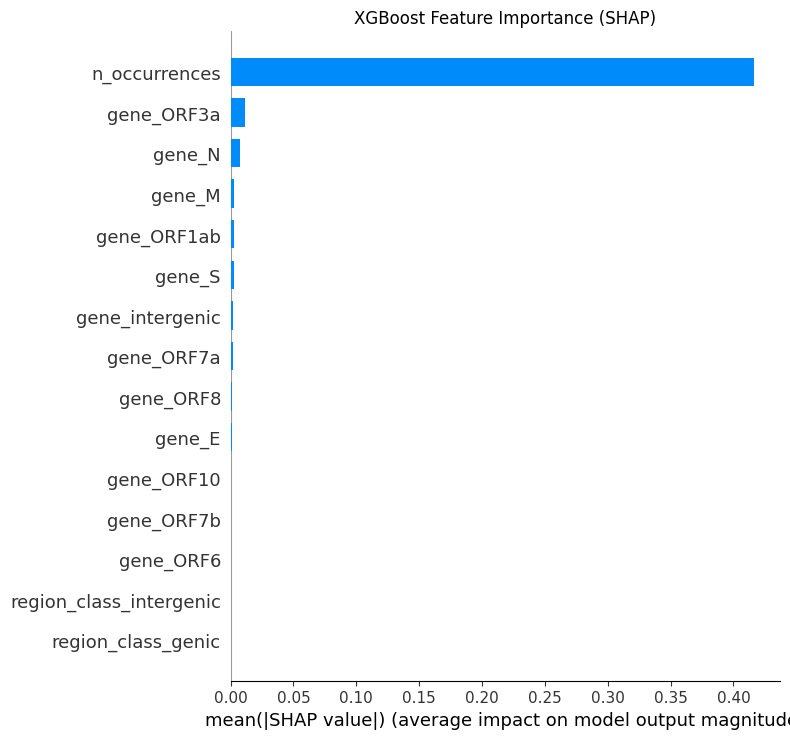

[LightGBM] [Info] Number of positive: 7748, number of negative: 22536
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 30284, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

Model AUC Scores:
RandomForest: 0.6309
XGBoost: 0.6420
LightGBM: 0.6369


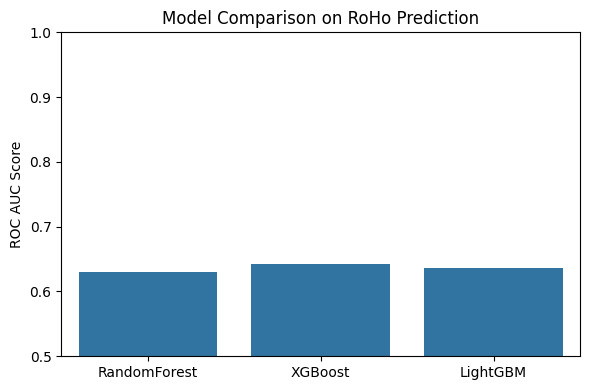

In [55]:
# features should already be prepared (e.g., one-hot encoded)
compare_models(features)

In [57]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.2 MB/s eta 0:00:00


CatBoost for RoHo Mutation Prediction

In [58]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, classification_report

# Prepare features
df = annotated_df[['gene', 'region_class', 'n_occurrences', 'high_roho']].copy()
X = df.drop("high_roho", axis=1)
y = df["high_roho"]

# CatBoost can use categorical columns as-is (just tell it which ones)
cat_features = ['gene', 'region_class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Define CatBoost
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    cat_features=cat_features,
    class_weights=[1, 3],  # balance positives
    eval_metric='AUC',
    verbose=0,
    random_state=42
)

# Fit
model.fit(X_train, y_train)

# Predict
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Evaluate
print("CatBoost AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))


CatBoost AUC: 0.6379897366989161
              precision    recall  f1-score   support

           0       0.82      0.54      0.65      5634
           1       0.33      0.66      0.44      1937

    accuracy                           0.57      7571
   macro avg       0.57      0.60      0.54      7571
weighted avg       0.69      0.57      0.60      7571



In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier

import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import shap
import seaborn as sns
import pandas as pd

def compare_models(features_df, label_col='high_roho'):
    # Preprocessing
    features = features_df.copy()
    X = features.drop(label_col, axis=1)
    y = features[label_col]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42)

    # Store results
    results = {}

    # Random Forest
    rf = RandomForestClassifier(class_weight='balanced', random_state=42)
    rf.fit(X_train, y_train)
    rf_prob = rf.predict_proba(X_test)[:, 1]
    results['RandomForest'] = roc_auc_score(y_test, rf_prob)

    # XGBoost (tuned)
    scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        eval_metric='auc',
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )

    param_grid = {
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [100, 200],
        'subsample': [0.8, 1.0]
    }

    grid = GridSearchCV(
        xgb_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)
    xgb_best = grid.best_estimator_
    xgb_prob = xgb_best.predict_proba(X_test)[:, 1]
    results['XGBoost'] = roc_auc_score(y_test, xgb_prob)

    # SHAP plot for XGBoost
    explainer = shap.TreeExplainer(xgb_best)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)
    plt.title("XGBoost Feature Importance (SHAP)")
    plt.tight_layout()
    plt.show()

    # LightGBM
    lgb_model = lgb.LGBMClassifier(class_weight='balanced', random_state=42)
    lgb_model.fit(X_train, y_train)
    lgb_prob = lgb_model.predict_proba(X_test)[:, 1]
    results['LightGBM'] = roc_auc_score(y_test, lgb_prob)

        # CatBoost
    cat_features = [i for i, col in enumerate(X.columns) if 'gene_' in col or 'region_class_' in col]  # If one-hot encoded
    # OR if you passed raw strings (not one-hot): use ['gene', 'region_class']

    catboost_model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.1,
        depth=6,
        cat_features=cat_features,
        class_weights=[1, 3],
        eval_metric='AUC',
        verbose=0,
        random_state=42
    )
    catboost_model.fit(X_train, y_train)

    cat_prob = catboost_model.predict_proba(X_test)[:, 1]
    results['CatBoost'] = roc_auc_score(y_test, cat_prob)

    # Final AUC Comparison
    print("\nModel AUC Scores:")
    for model, auc in results.items():
        print(f"{model}: {auc:.4f}")

    # Bar plot
    plt.figure(figsize=(6,4))
    sns.barplot(x=list(results.keys()), y=list(results.values()))
    plt.ylabel("ROC AUC Score")
    plt.title("Model Comparison on RoHo Prediction")
    plt.ylim(0.5, 1.0)
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:28:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


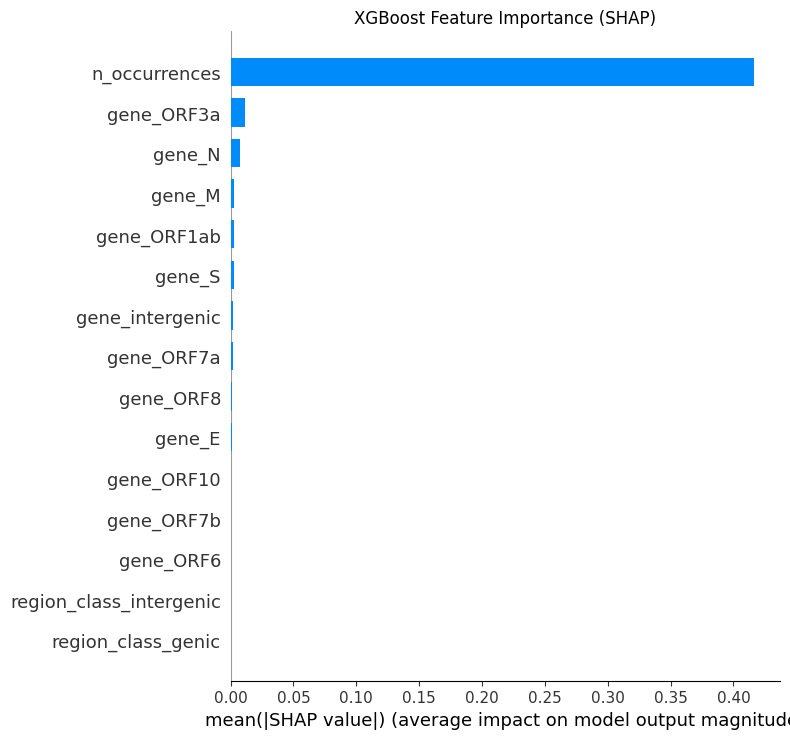

[LightGBM] [Info] Number of positive: 7748, number of negative: 22536
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 30284, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

Model AUC Scores:
RandomForest: 0.6309
XGBoost: 0.6420
LightGBM: 0.6369
CatBoost: 0.6365


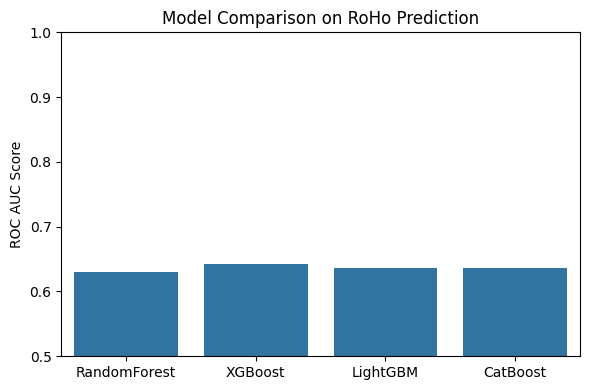

In [60]:
# features should already be prepared (e.g., one-hot encoded)
compare_models(features)